# Oil Price Prediction P-238  Group 4

In [ ]:
#Pandas helps you to perform data analysis and data manipulation in Python language
import pandas as pd
#NumPy is one of the most essential Python Libraries for scientific computing
import numpy as np
#Matplotlib is the most popular library for exploration and Basic data visualization in the Python
import matplotlib.pyplot as plt

#%matplotlib inline sets the backend of matplotlib to the 'inline' backend.
%matplotlib inline

#Seaborn for  high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns


import calendar
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
from scipy.stats import boxcox
from scipy import stats


#The warn() function defined in the ' warning ' module is used to show ... is not displayed
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading Dataset
Oil_Price = pd.read_csv("C:\Users\my pc\Downloads\Crude oil.csv")

SyntaxError: ignored

In [ ]:
Oil_Price

,Date,Price,Open,High,Low,Volume,Chg%
0,May-84,30.83,30.30,31.50,30.10,40.25K,1.88%
1,Jun-84,29.75,30.86,30.88,29.04,39.40K,-3.50%
2,Jul-84,27.60,29.82,29.99,27.55,54.91K,-7.23%
3,Aug-84,29.23,27.76,30.00,27.73,65.85K,5.91%
4,Sep-84,29.66,29.06,29.85,28.84,35.82K,1.47%
...,...,...,...,...,...,...,...
464,Jan-23,80.11,80.57,82.66,72.47,189.32K,-0.45%
465,Feb-23,77.05,79.12,80.61,72.25,300.09K,-3.82%
466,Mar-23,75.67,76.85,80.94,64.12,7.07M,-1.79%
467,Apr-23,76.78,80.27,83.53,73.93,328.40K,1.47%


# EDA

In [ ]:
Oil_Price.shape

(469, 7)

In [ ]:
Oil_Price.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,May-84,30.83,30.30,31.50,30.10,40.25K,1.88%
1,Jun-84,29.75,30.86,30.88,29.04,39.40K,-3.50%
2,Jul-84,27.60,29.82,29.99,27.55,54.91K,-7.23%
3,Aug-84,29.23,27.76,30.00,27.73,65.85K,5.91%
4,Sep-84,29.66,29.06,29.85,28.84,35.82K,1.47%


In [ ]:
Oil_Price.isna().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [ ]:
Oil_Price.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Volume     object
Chg%       object
dtype: object

In [ ]:
Oil_Price.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
464    False
465    False
466    False
467    False
468    False
Length: 469, dtype: bool

In [ ]:
Oil_Price[Oil_Price.duplicated()].shape

(0, 7)

In [ ]:
Oil_Price.describe()

,Price,Open,High,Low
count,469.000000,469.000000,469.000000,469.000000
mean,45.750149,45.657804,49.015693,42.083603
std,29.249297,29.268176,31.082286,27.423417
min,10.420000,9.950000,12.620000,-40.320000
25%,20.280000,20.250000,21.480000,19.090000
50%,33.510000,33.200000,36.370000,29.750000
75%,67.040000,67.010000,71.060000,61.740000
max,140.000000,140.180000,147.270000,121.610000


In [ ]:
Oil_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    469 non-null    object 
 1   Price   469 non-null    float64
 2   Open    469 non-null    float64
 3   High    469 non-null    float64
 4   Low     469 non-null    float64
 5   Volume  469 non-null    object 
 6   Chg%    469 non-null    object 
dtypes: float64(4), object(3)
memory usage: 25.8+ KB


In [ ]:
Oil_Price.corr()

,Price,Open,High,Low
Price,1.000000,0.985127,0.991706,0.990070
Open,0.985127,1.000000,0.994269,0.984903
High,0.991706,0.994269,1.000000,0.984043
Low,0.990070,0.984903,0.984043,1.000000


## Outlier Detection

## Box PLot

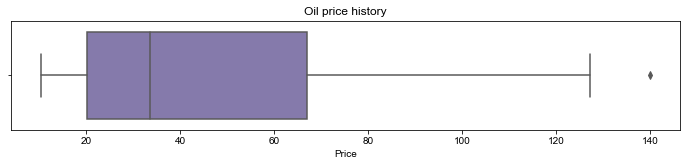

In [ ]:
fig = plt.subplots(figsize = (12, 2))
sns.set_theme(style="whitegrid")
sns.boxplot( Oil_Price['Price'],color ='m')
plt.title("Oil price history")
plt.xlabel('Price')
plt.show()

## Distplot

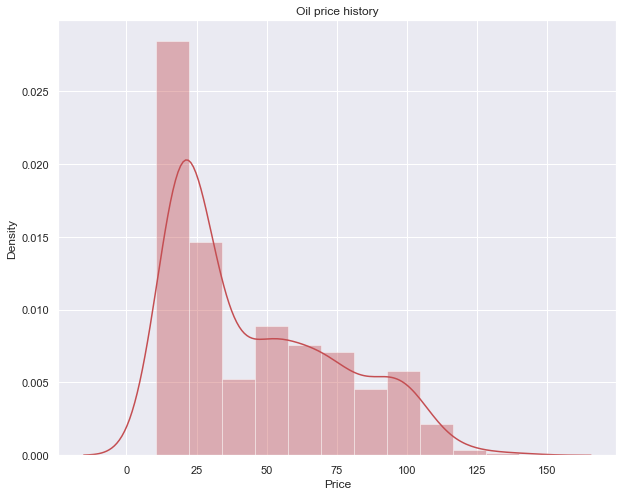

In [ ]:
sns.set()
fig = plt.subplots(figsize = (10, 8))
sns.distplot(Oil_Price['Price'], color ='r')
plt.title("Oil price history")
plt.xlabel('Price')
plt.show()

Text(0.5, 1.0, 'Quantile plot for Oil Price')

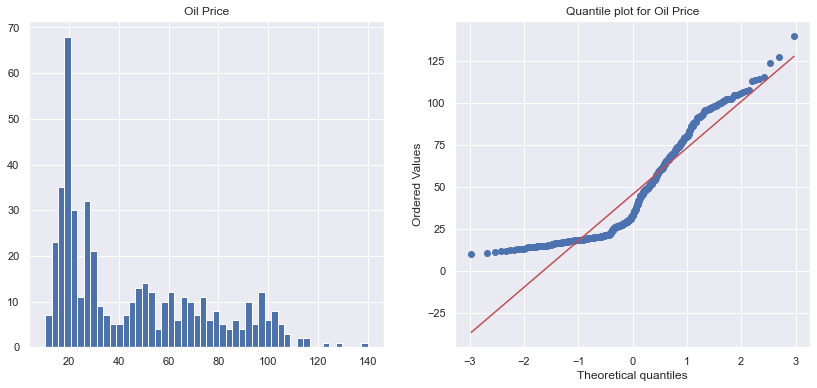

In [ ]:
from scipy import stats

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
Oil_Price['Price'].hist(bins=50)
plt.title('Oil Price')

plt.subplot(1,2,2)
stats.probplot(Oil_Price['Price'], plot=plt);
plt.title('Quantile plot for Oil Price')

# Visualisation

<AxesSubplot:>

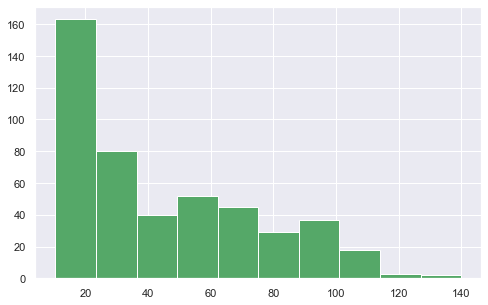

In [ ]:
# Histogram
Oil_Price['Price'].hist(figsize=(8,5), color = 'g')

<AxesSubplot:ylabel='Density'>

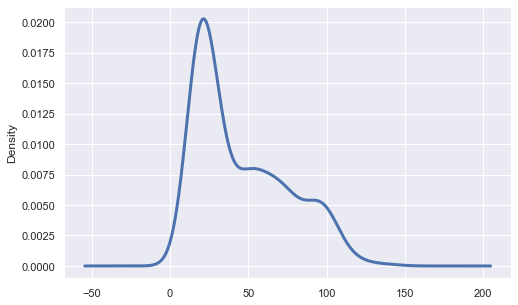

In [ ]:
# Density Plot
Oil_Price['Price'].plot(kind = 'kde',linewidth=3 ,color = 'b', figsize=(8,5), grid= True)

## Extract Month and Year values separately from 'Date column'

In [ ]:
#  extract Month and Year values separately from 'Date column'
#Oil_Price['Month'] = 0
#Oil_Price['Year'] = 0
Oil_Price['Year'] = Oil_Price['Date'].str[-2:]
Oil_Price['Month'] = Oil_Price['Date'].str[0:3]

#for i in range(469):
  #  p = Oil_Price['Month'][i]
  #  Oil_Price['Month'][i]= p[0:7]
   # Oil_Price['Year'][i]= p[8:10]

In [ ]:
Oil_Price.head()

,Date,Price,Open,High,Low,Volume,Chg%,Year,Month
0,May-84,30.83,30.30,31.50,30.10,40.25K,1.88%,84,May
1,Jun-84,29.75,30.86,30.88,29.04,39.40K,-3.50%,84,Jun
2,Jul-84,27.60,29.82,29.99,27.55,54.91K,-7.23%,84,Jul
3,Aug-84,29.23,27.76,30.00,27.73,65.85K,5.91%,84,Aug
4,Sep-84,29.66,29.06,29.85,28.84,35.82K,1.47%,84,Sep


<function matplotlib.pyplot.show(close=None, block=None)>

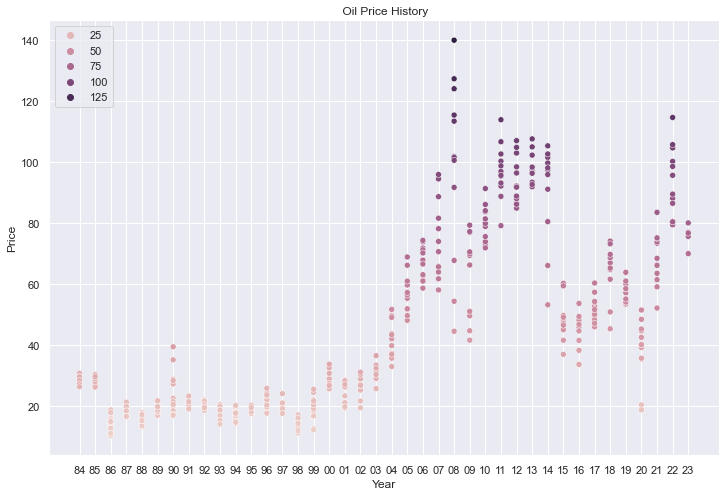

In [ ]:
fig = plt.subplots(figsize = (12,8))
sns.scatterplot(data=Oil_Price,x='Year',y='Price',hue = 'Price')
plt.title(" Oil Price History")
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid("darkgrid")
plt.legend(loc='upper left')
plt.show

<AxesSubplot:>

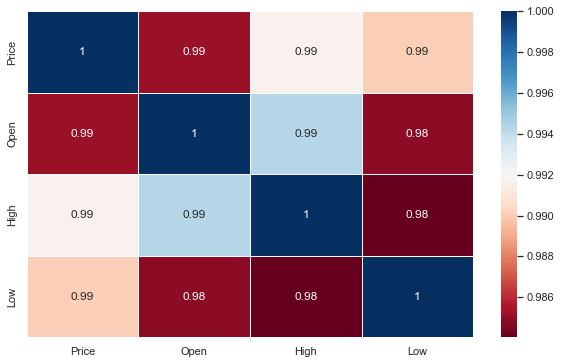

In [ ]:
sns.heatmap(Oil_Price.corr(),annot = True,linewidth = 0.9,cmap='RdBu')

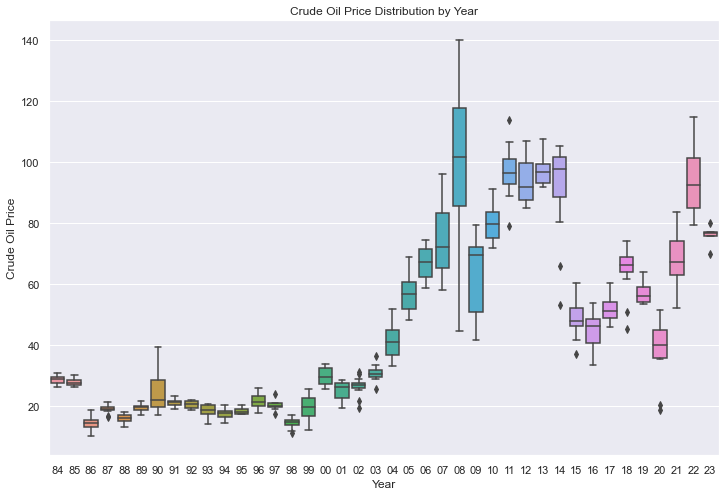

In [ ]:
# Box plot of price by year
plt.figure(figsize=(12, 8))
sns.boxplot(data = Oil_Price, x='Year', y='Price')
plt.xlabel('Year')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Distribution by Year')
plt.show()

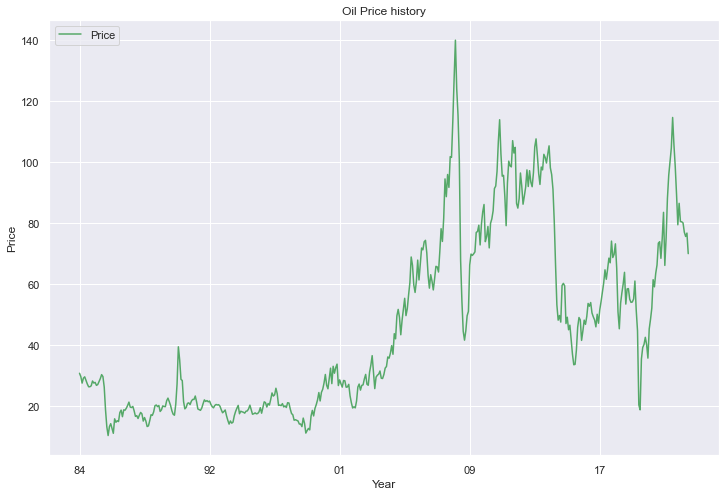

In [ ]:
Oil_Price_ax = Oil_Price.plot(x='Year',y='Price',figsize=(12,8),color='g',grid= True)
Oil_Price_ax.set_title('Oil Price history')
Oil_Price_ax.set_xlabel('Year')
Oil_Price_ax.set_ylabel('Price')
Oil_Price_ax.legend(loc='upper left')
plt.show()

In [3]:
sns.pairplot(Oil_Price)

NameError: ignored

# Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
# Extract the numerical columns
numerical_cols = ['Price', 'Open', 'High', 'Low']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numerical columns
Oil_Price[numerical_cols] = scaler.fit_transform(Oil_Price[numerical_cols])

Oil_Price1 = Oil_Price.drop(['Chg%','Volume','Month','Year'],axis = 1)

# Print the standardized dataset
print(Oil_Price1)


       Date     Price      Open      High       Low
0    May-84 -0.510648 -0.525287 -0.564128 -0.437451
1    Jun-84 -0.547611 -0.506134 -0.584097 -0.476145
2    Jul-84 -0.621195 -0.541705 -0.612761 -0.530536
3    Aug-84 -0.565408 -0.612164 -0.612439 -0.523966
4    Sep-84 -0.550691 -0.567699 -0.617270 -0.483446
..      ...       ...       ...       ...       ...
464  Jan-23  1.175978  1.194112  1.083583  1.109229
465  Feb-23  1.071249  1.144517  1.017558  1.101198
466  Mar-23  1.024018  1.066876  1.028187  0.804419
467  Apr-23  1.062008  1.183851  1.111603  1.162525
468  May-23  0.831329  1.042249  0.878102  0.789088

[469 rows x 5 columns]


# Stationarity Checking

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Extract the 'Price' column
price_series = Oil_Price['Price']

In [ ]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(price_series)
result

(-2.290121018409085,
 0.17517393813671528,
 1,
 467,
 {'1%': -3.4444305322234365,
  '5%': -2.8677488864580885,
  '10%': -2.5700770984781443},
 -303.7449485784539)

In [ ]:
# Extract the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]
# Define a significance level
significance_level = 0.05

In [ ]:
# Compare the p-value with the significance level
if p_value < significance_level:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

The time series is non-stationary.


In [ ]:
# Perform differencing to make the time series stationary
differenced_series = price_series.diff().dropna()
# Perform the ADF test on the differenced series
differenced_result = adfuller(differenced_series)
# Extract the test statistic and p-value for the differenced series
differenced_adf_statistic = differenced_result[0]
differenced_p_value = differenced_result[1]
# Compare the p-value of the differenced series with the significance level
if differenced_p_value < significance_level:
    print("After differencing, the time series is stationary.")
else:
    print("Differencing did not make the time series stationary.")

After differencing, the time series is stationary.


# Data Driven Forecasting Methods

In [ ]:
# Splitting Data
Train = Oil_Price.head(295)
Test = Oil_Price.tail(74)

# Moving Average Method

In [ ]:
# Extract the 'Price' column
price_series = Oil_Price['Price']

# Set the window size for the moving average
window_size = 30

# Calculate the moving average
moving_average = price_series.rolling(window=window_size).mean()
moving_average

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
464    0.984830
465    1.024120
466    1.064563
467    1.111327
468    1.139506
Name: Price, Length: 469, dtype: float64

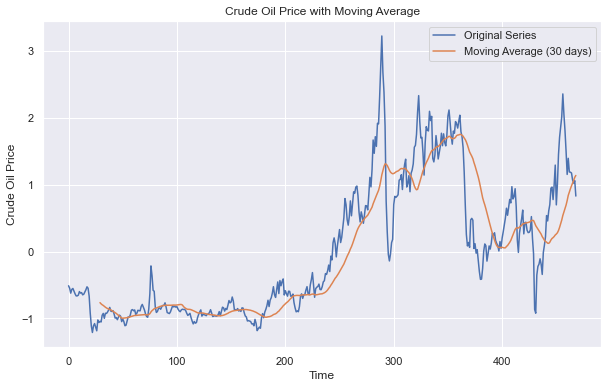

In [ ]:
# Plot the original series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(price_series, label='Original Series')
plt.plot(moving_average, label=f'Moving Average ({window_size} days)')
plt.xlabel('Time')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price with Moving Average')
plt.legend()
plt.show()

In [ ]:
# Time series decomposition plot

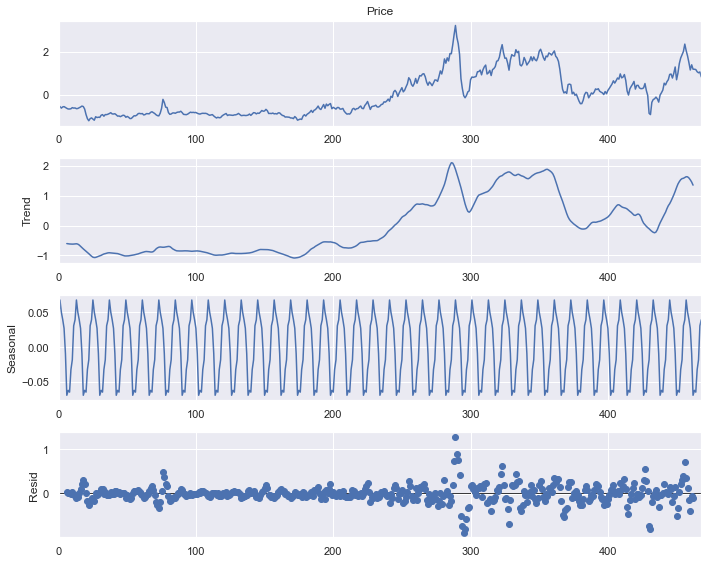

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(10,8)}, style = 'darkgrid')
decompose_ts_add = seasonal_decompose(Oil_Price.Price,period=12)
decompose_ts_add.plot()
plt.show()

# Check average monthly and yearly Oil price

In [ ]:
Oil_Price_month_yearly = pd.pivot_table(Oil_Price, values="Price",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
Oil_Price_month_yearly

Year,00,01,02,03,04,05,06,07,08,09,...,91,92,93,94,95,96,97,98,99,All
Month,,,,,,,,,,,,,,,,,,,,,
Apr,-0.684855,-0.591762,-0.631805,-0.682801,-0.286471,0.135870,0.894304,0.683133,2.317394,0.183785,...,-0.848452,-0.852217,-0.863169,-0.987407,-0.868303,-0.840238,-0.874121,-1.039087,-0.927170,4.689241e-02
Aug,-0.432271,-0.634886,-0.573964,-0.485321,-0.124243,0.793681,0.838859,0.968230,2.385845,0.828591,...,-0.803959,-0.830655,-0.939834,-0.964818,-0.955235,-0.804301,-0.894656,-1.109249,-0.809093,2.975341e-02
Dec,-0.648576,-0.886784,-0.497984,-0.452807,-0.078723,0.523301,0.523643,1.719135,-0.039364,1.150309,...,-0.911427,-0.898421,-1.080842,-0.957973,-0.896710,-0.678694,-0.962080,-1.153400,-0.689646,-5.852170e-02
Feb,-0.524338,-0.628383,-0.821756,-0.313167,-0.328226,0.205347,0.535964,0.548970,1.919695,-0.033888,...,-0.910057,-0.926486,-0.860773,-1.070232,-0.932988,-0.897052,-0.871041,-1.037376,-1.145870,-2.227792e-02
Jan,-0.619826,-0.584917,-0.899105,-0.418924,-0.434667,0.083847,0.758771,0.424047,1.574362,-0.139302,...,-0.828601,-0.918956,-0.872410,-1.045932,-0.936411,-0.958658,-0.739273,-0.976797,-1.129442,-5.590653e-02
Jul,-0.627014,-0.663977,-0.641046,-0.520573,-0.066745,0.507215,0.980552,1.110950,2.680868,0.811136,...,-0.823810,-0.817307,-0.953866,-0.871041,-0.964818,-0.866934,-0.876517,-1.079473,-0.863169,3.485211e-02
Jun,-0.453491,-0.667400,-0.646522,-0.532552,-0.297766,0.367918,0.964466,0.853233,3.225735,0.826195,...,-0.862142,-0.826548,-0.920667,-0.902870,-0.970294,-0.849821,-0.888153,-1.080500,-0.905608,4.971820e-02
Mar,-0.645153,-0.666031,-0.665346,-0.503460,-0.341916,0.330270,0.714620,0.688609,1.910797,0.133816,...,-0.893972,-0.900474,-0.866249,-1.059622,-0.909715,-0.830997,-0.867276,-1.031558,-0.992198,-5.691784e-03
May,-0.572938,-0.594842,-0.699572,-0.554114,-0.200908,0.212877,0.874111,0.624950,2.792784,0.703668,...,-0.842634,-0.809093,-0.880624,-0.939149,-0.919298,-0.889522,-0.851190,-1.045590,-0.989460,3.937117e-02


In [ ]:
# Setting the index (month names)
mname_index = [[calendar.month_abbr[i] if isinstance(i, int)

                else i
                                       for i in list(Oil_Price_month_yearly.index)]]
Oil_Price_month_yearly = Oil_Price_month_yearly.set_index(mname_index)

Oil_Price_month_yearly

Year,00,01,02,03,04,05,06,07,08,09,...,91,92,93,94,95,96,97,98,99,All
Apr,-0.684855,-0.591762,-0.631805,-0.682801,-0.286471,0.135870,0.894304,0.683133,2.317394,0.183785,...,-0.848452,-0.852217,-0.863169,-0.987407,-0.868303,-0.840238,-0.874121,-1.039087,-0.927170,4.689241e-02
Aug,-0.432271,-0.634886,-0.573964,-0.485321,-0.124243,0.793681,0.838859,0.968230,2.385845,0.828591,...,-0.803959,-0.830655,-0.939834,-0.964818,-0.955235,-0.804301,-0.894656,-1.109249,-0.809093,2.975341e-02
Dec,-0.648576,-0.886784,-0.497984,-0.452807,-0.078723,0.523301,0.523643,1.719135,-0.039364,1.150309,...,-0.911427,-0.898421,-1.080842,-0.957973,-0.896710,-0.678694,-0.962080,-1.153400,-0.689646,-5.852170e-02
Feb,-0.524338,-0.628383,-0.821756,-0.313167,-0.328226,0.205347,0.535964,0.548970,1.919695,-0.033888,...,-0.910057,-0.926486,-0.860773,-1.070232,-0.932988,-0.897052,-0.871041,-1.037376,-1.145870,-2.227792e-02
Jan,-0.619826,-0.584917,-0.899105,-0.418924,-0.434667,0.083847,0.758771,0.424047,1.574362,-0.139302,...,-0.828601,-0.918956,-0.872410,-1.045932,-0.936411,-0.958658,-0.739273,-0.976797,-1.129442,-5.590653e-02
Jul,-0.627014,-0.663977,-0.641046,-0.520573,-0.066745,0.507215,0.980552,1.110950,2.680868,0.811136,...,-0.823810,-0.817307,-0.953866,-0.871041,-0.964818,-0.866934,-0.876517,-1.079473,-0.863169,3.485211e-02
Jun,-0.453491,-0.667400,-0.646522,-0.532552,-0.297766,0.367918,0.964466,0.853233,3.225735,0.826195,...,-0.862142,-0.826548,-0.920667,-0.902870,-0.970294,-0.849821,-0.888153,-1.080500,-0.905608,4.971820e-02
Mar,-0.645153,-0.666031,-0.665346,-0.503460,-0.341916,0.330270,0.714620,0.688609,1.910797,0.133816,...,-0.893972,-0.900474,-0.866249,-1.059622,-0.909715,-0.830997,-0.867276,-1.031558,-0.992198,-5.691784e-03
May,-0.572938,-0.594842,-0.699572,-0.554114,-0.200908,0.212877,0.874111,0.624950,2.792784,0.703668,...,-0.842634,-0.809093,-0.880624,-0.939149,-0.919298,-0.889522,-0.851190,-1.045590,-0.989460,3.937117e-02
Nov,-0.408314,-0.900474,-0.645495,-0.525022,0.115677,0.395982,0.594832,1.470316,0.297071,1.079121,...,-0.830655,-0.885073,-1.037718,-0.948048,-0.943598,-0.752963,-0.910400,-1.181807,-0.724214,-6.880686e-02


In [ ]:
#Check datatype

Oil_Price_month_yearly.dtypes

Year
00     float64
01     float64
02     float64
03     float64
04     float64
05     float64
06     float64
07     float64
08     float64
09     float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
84     float64
85     float64
86     float64
87     float64
88     float64
89     float64
90     float64
91     float64
92     float64
93     float64
94     float64
95     float64
96     float64
97     float64
98     float64
99     float64
All    float64
dtype: object

In [ ]:
#change datatype float into int

Oil_Price_month_yearly = Oil_Price_month_yearly.astype('int')
Oil_Price_month_yearly.head()

Year,00,01,02,03,04,05,06,07,08,09,...,91,92,93,94,95,96,97,98,99,All
Apr,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,-1,0,0
Aug,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,-1,0,0
Dec,0,0,0,0,0,0,0,1,0,1,...,0,0,-1,0,0,0,0,-1,0,0
Feb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1,0,0,0,-1,-1,0
Jan,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1,0,0,0,0,-1,0


In [ ]:
Oil_Price_month_yearly.dtypes

Year
00     int32
01     int32
02     int32
03     int32
04     int32
05     int32
06     int32
07     int32
08     int32
09     int32
10     int32
11     int32
12     int32
13     int32
14     int32
15     int32
16     int32
17     int32
18     int32
19     int32
20     int32
21     int32
22     int32
23     int32
84     int32
85     int32
86     int32
87     int32
88     int32
89     int32
90     int32
91     int32
92     int32
93     int32
94     int32
95     int32
96     int32
97     int32
98     int32
99     int32
All    int32
dtype: object

# Visualization for average Oil price
### heatmap for average Oil price for all months

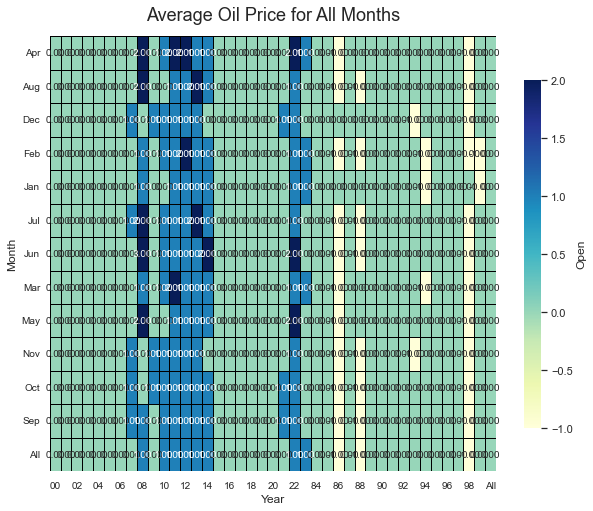

In [ ]:
ax = sns.heatmap(Oil_Price_month_yearly, cmap='YlGnBu', robust=True, fmt='.2f',
                 annot=True, linewidths=.8,linecolor = 'black', annot_kws={'size':10},
                 cbar_kws={'shrink':.8, 'label':'Open'})

ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=10)
ax.set_ylabel('Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Oil Price for All Months', fontdict={'fontsize':18},    pad=16);

# Boxplot for average gold price

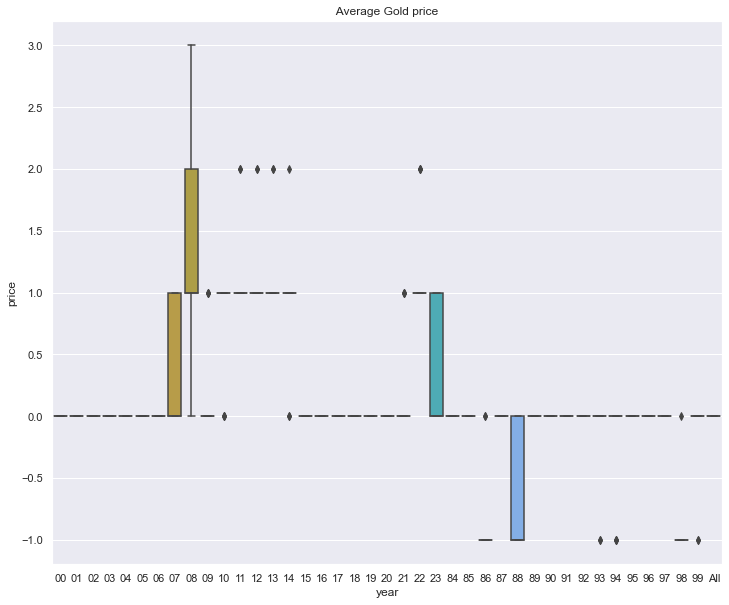

In [ ]:
fig = plt.subplots(figsize = (12,10))
sns.boxplot(data = Oil_Price_month_yearly)
plt.title(" Average Gold price ")
plt.xlabel('year')
plt.ylabel('price')
plt.show()

### Scatterplot for average gold price

<function matplotlib.pyplot.show(close=None, block=None)>

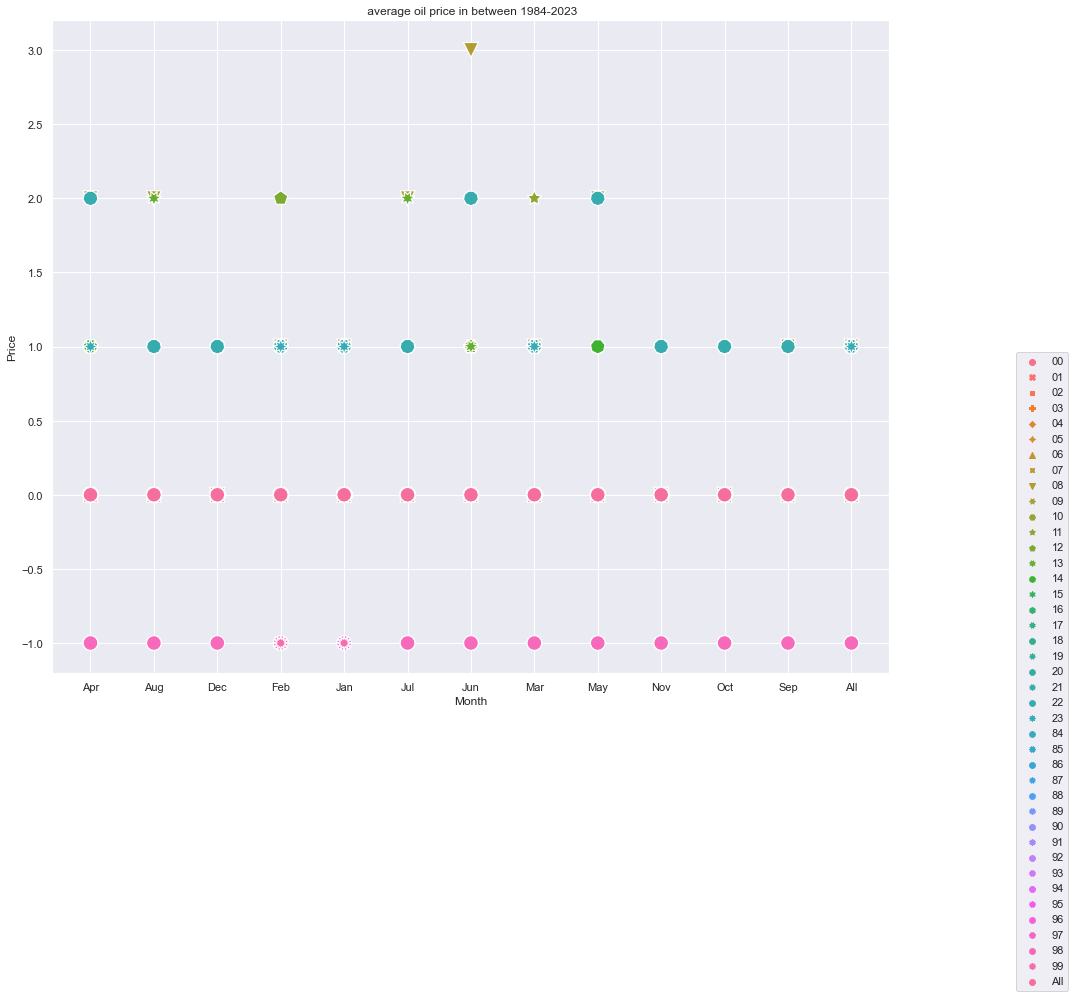

In [ ]:
fig = plt.subplots(figsize = (15,12))
ax = sns.scatterplot(data= Oil_Price_month_yearly,s = 15**2)
plt.title(" average oil price in between 1984-2023")
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.22,0.5), loc= 'upper right')
plt.show

# MODEL Building

In [ ]:
# Loading Dataset
DF1 = pd.read_csv('C:/Users/HP/Downloads/OilPriceMonthly.csv')

In [ ]:
DF1.head(5)

,Date,Price,Open,High,Low,Volume,Chg%
0,May-84,30.83,30.30,31.50,30.10,40.25K,1.88%
1,Jun-84,29.75,30.86,30.88,29.04,39.40K,-3.50%
2,Jul-84,27.60,29.82,29.99,27.55,54.91K,-7.23%
3,Aug-84,29.23,27.76,30.00,27.73,65.85K,5.91%
4,Sep-84,29.66,29.06,29.85,28.84,35.82K,1.47%


In [ ]:
DF1.tail(5)

,Date,Price,Open,High,Low,Volume,Chg%
464,Jan-23,80.11,80.57,82.66,72.47,189.32K,-0.45%
465,Feb-23,77.05,79.12,80.61,72.25,300.09K,-3.82%
466,Mar-23,75.67,76.85,80.94,64.12,7.07M,-1.79%
467,Apr-23,76.78,80.27,83.53,73.93,328.40K,1.47%
468,May-23,70.04,76.13,76.28,63.70,365.89K,-8.78%


# Data Driven Forecasting Methods

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

##### Splitting Data

In [ ]:
# Splitting Data
Train = DF1.head(295)
Test = DF1.tail(74)

### Evaluation Metric RMSE

In [ ]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### Simple Exponential Method

In [ ]:
warnings.filterwarnings('ignore')
ses_model = SimpleExpSmoothing(Train["Price"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Price, pred_ses)
rmse_ses_model

20.794723709595328

## Holt method

In [ ]:
hw_model = Holt(Train["Price"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Price, pred_hw)
rmse_hw_model

1956.4863838912852

## Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Price"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Price, pred_hwe_add_add)
rmse_hwe_add_add_model

1822.8084480266934

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Price"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Price, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

1425.8331020589396

# Model based Forecasting Methods

In [ ]:
# Data preprocessing for models
DF1["t"] = np.arange(469)
DF1["t_squared"] = DF1["t"]*DF1["t"]

DF1["log_price"] = np.log(DF1["Price"])

DF1.head()

,Date,Price,Open,High,Low,Volume,Chg%,t,t_squared,log_price
0,May-84,30.83,30.30,31.50,30.10,40.25K,1.88%,0,0,3.428488
1,Jun-84,29.75,30.86,30.88,29.04,39.40K,-3.50%,1,1,3.392829
2,Jul-84,27.60,29.82,29.99,27.55,54.91K,-7.23%,2,4,3.317816
3,Aug-84,29.23,27.76,30.00,27.73,65.85K,5.91%,3,9,3.375196
4,Sep-84,29.66,29.06,29.85,28.84,35.82K,1.47%,4,16,3.389799


###  Splitting Data

In [ ]:
Train = DF1.head(295)
Test = DF1.tail(74)

## Linear Model

In [ ]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Price'], pred_linear)
rmse_linear_model

23.513538795893435

## Exponential Model

In [ ]:
Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Price'], np.exp(pred_Exp))
rmse_Exp_model

30.199803827407887

## Quadratic Model

In [ ]:
Quad = smf.ols('Price~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Price'], pred_Quad)
rmse_Quad_model

168.69291973840015

In [ ]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Model',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model]]

In [ ]:
dataf = pd.DataFrame(list, columns =['Model', 'RMSE_Value'])
dataf

,Model,RMSE_Value
0,Simple Exponential Method,20.794724
1,Holt method,1956.486384
2,HW exp smoothing add,1822.808448
3,HW exp smoothing mult,1425.833102
4,Linear Model,23.513539
5,Exp model,30.199804
6,Quad model,168.692920


## Building final model with least RMSE value

In [ ]:
DF1.head(5)

,Date,Price,Open,High,Low,Volume,Chg%,t,t_squared,log_price
0,May-84,30.83,30.30,31.50,30.10,40.25K,1.88%,0,0,3.428488
1,Jun-84,29.75,30.86,30.88,29.04,39.40K,-3.50%,1,1,3.392829
2,Jul-84,27.60,29.82,29.99,27.55,54.91K,-7.23%,2,4,3.317816
3,Aug-84,29.23,27.76,30.00,27.73,65.85K,5.91%,3,9,3.375196
4,Sep-84,29.66,29.06,29.85,28.84,35.82K,1.47%,4,16,3.389799


In [ ]:
DF1.tail(5)

,Date,Price,Open,High,Low,Volume,Chg%,t,t_squared,log_price
464,Jan-23,80.11,80.57,82.66,72.47,189.32K,-0.45%,464,215296,4.383401
465,Feb-23,77.05,79.12,80.61,72.25,300.09K,-3.82%,465,216225,4.344455
466,Mar-23,75.67,76.85,80.94,64.12,7.07M,-1.79%,466,217156,4.326382
467,Apr-23,76.78,80.27,83.53,73.93,328.40K,1.47%,467,218089,4.340944
468,May-23,70.04,76.13,76.28,63.70,365.89K,-8.78%,468,219024,4.249067


In [ ]:
final_model = smf.ols('Price~t+t_squared',data=DF1).fit()
pred_final = pd.Series(final_model.predict(DF1[['t','t_squared']]))
rmse_final_model = RMSE(DF1['Price'], pred_final)
rmse_final_model

20.196595419561532

In [ ]:
pred_dataf = pd.DataFrame({'Actual' : DF1.Price, 'Predicted' : pred_final})
pred_dataf.tail(30)

,Actual,Predicted
439,48.52,75.425351
440,52.20,75.542547
441,61.50,75.659557
442,59.16,75.776381
443,63.58,75.893017
444,66.32,76.009467
445,73.47,76.125731
446,73.95,76.241808
447,68.50,76.357698
448,75.03,76.473402


## ARIMA MODEL

In [ ]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
series = read_csv('C:/Users/HP/Downloads/OilPriceMonthly.csv', header=0, index_col=0, parse_dates=True)

In [ ]:
series.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
May-84,30.83,30.30,31.50,30.10,40.25K,1.88%
Jun-84,29.75,30.86,30.88,29.04,39.40K,-3.50%
Jul-84,27.60,29.82,29.99,27.55,54.91K,-7.23%
Aug-84,29.23,27.76,30.00,27.73,65.85K,5.91%
Sep-84,29.66,29.06,29.85,28.84,35.82K,1.47%


In [ ]:
# Resetting index
series1 = series.reset_index()
series1.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,May-84,30.83,30.30,31.50,30.10,40.25K,1.88%
1,Jun-84,29.75,30.86,30.88,29.04,39.40K,-3.50%
2,Jul-84,27.60,29.82,29.99,27.55,54.91K,-7.23%
3,Aug-84,29.23,27.76,30.00,27.73,65.85K,5.91%
4,Sep-84,29.66,29.06,29.85,28.84,35.82K,1.47%


<AxesSubplot:xlabel='Date'>

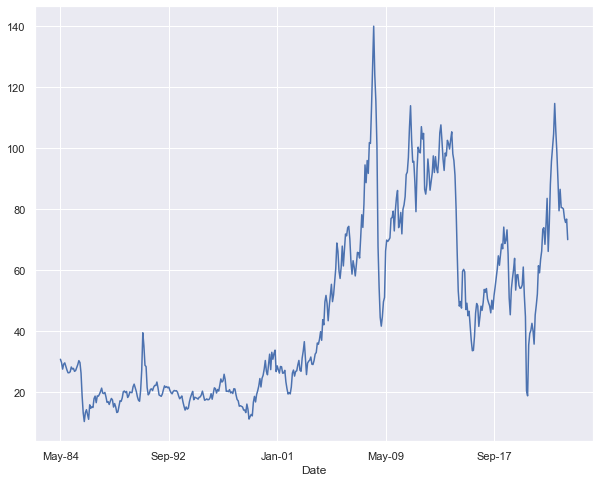

In [ ]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.Price.plot()

In [ ]:
# separate out a validation dataset (80%-training data and 20% test data)
series1 =series.drop(['Open','High', 'Low','Volume','Chg%'],axis = 1)
split_point = len(series1) - 94
dataset, validation = series1[0:split_point], series1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('C:/Users/HP/Downloads/dataset.csv', header=False)
validation.to_csv('C:/Users/HP/Downloads/validation.csv', header=False)

Dataset 375, Validation 94


### Persistence/ Base model

In [ ]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('C:/Users/HP/Downloads/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

In [ ]:
len(test)

75

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.1f, Observed =%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=51.1, Observed =66.310
>Predicted=66.3, Observed =69.890
>Predicted=69.9, Observed =69.450
>Predicted=69.4, Observed =69.960
>Predicted=70.0, Observed =70.610
>Predicted=70.6, Observed =77.000
>Predicted=77.0, Observed =77.280
>Predicted=77.3, Observed =79.360
>Predicted=79.4, Observed =72.890
>Predicted=72.9, Observed =79.660
>Predicted=79.7, Observed =83.760
>Predicted=83.8, Observed =86.150
>Predicted=86.2, Observed =73.970
>Predicted=74.0, Observed =75.630
>Predicted=75.6, Observed =78.950
>Predicted=78.9, Observed =71.920
>Predicted=71.9, Observed =79.970
>Predicted=80.0, Observed =81.430
>Predicted=81.4, Observed =84.110
>Predicted=84.1, Observed =91.380
>Predicted=91.4, Observed =92.190
>Predicted=92.2, Observed =96.970
>Predicted=97.0, Observed =106.720
>Predicted=106.7, Observed =113.930
>Predicted=113.9, Observed =102.700
>Predicted=102.7, Observed =95.420
>Predicted=95.4, Observed =95.700
>Predicted=95.7, Observed =88.810
>Predicted=88.8, Observed =79.200
>Predict

ValueError: Found input variables with inconsistent numbers of samples: [75, 82]

### ARIMA Hyperparameter

In [ ]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

### Grid search for p,d,q values

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = pd.read_csv('C:/Users/HP/Downloads/dataset.csv', header = None , index_col =0, parse_dates = True, squeeze =True)
# evaluate parameters
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
warnings.filterwarnings("ignore")
evaluate_models(train.values,p_values, d_values, q_values)

In [ ]:
p_values, d_values, q_values

### Build model based on the optimized values

In [ ]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data
train = read_csv('C:/Users/HP/Downloads/dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
# fit model
model = ARIMA(X, order=(2, 0, 2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=47)[0]
model_fit.plot_predict(2,469)
plt.show()

In [ ]:
#Error on the test data
val=pd.read_csv('C:/Users/HP/Downloads/validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(val[1], forecast)
MAPE

In [ ]:
#hw_model.save('hw_model.json')

## Create a Pickle File using Serilization and dup Simple Linear Exponentional Model

In [ ]:
import pickle
pickle_out = open("ses_model.pkl","wb")
pickle.dump(ses_model,pickle_out)
pickle_out.close()

In [1]:
import numpy as np

In [2]:
ses_model.predict(200,294)

NameError: ignored

In [ ]:
import pickle
pickle_out = open("model_fit.pkl","wb")
pickle.dump(model_fit,pickle_out)
pickle_out.close()